This code loads the bananamaker analyzed data and plots 3 different types of plots.

The data is loaded in from a folder that contains our data. 
Then the relevant quantities are read out from the desired detectors and we end up defining 5 lists containing 4 lists, 1 for each id, that holds the relevant information needed to make the below plots.

The first being the sumspektrum from the telescope containing energy of the total events, meaning the sum of the DSSSD and Pad. One plot for each of the telescopes have been made, followed up by a total spektrum containing all telescopes.

Then a plot of the energy deposited in the DSSSD's(deltaE) and Pads(E) are made. The energies plotted are the direct deposited energies which have not been accounted for energy loss. It is the only the energy for telescope events that is plotted, whereas single DSSSD hits without a matching hit in the pad has been omitted.

Lastly a plot of the deposited energy in the DSSSD's as a function of the angle of incidence is made. This plot serves to give an idea og the energy range which a given detector can detect the particles in the experiment. 
The energies plotted are DSSSD events without a backing pad event, and this energy has thus been energy corrected.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import os
import scipy.optimize as sc
import matplotlib as mpl
import glob

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
data_path = "/home/haue/repositories/Masters/data/bananas/Al"
outputdir = "/figure_output/"

In [4]:
## Load in all files from the datapath with the suffix mlio.root
banana_files = glob.glob(os.path.join(data_path, "*mlio.root"))


In [5]:
#####
#Loading in of parameters needed for plotting and assigning them to lists
#These lists holds entries 0-3 which corresponds to detector id's 1-4
#####
Es = [[_] for _ in range(0,4)]
front_telescope_Es = [[_] for _ in range(0,4)]
back_telescope_Es = [[_] for _ in range(0,4)]
angles_of_incidence = [[_] for _ in range(0,4)]
Edeps = [[_] for _ in range(0,4)]

for f in banana_files:
    r = uproot.open(f)["a"]
    dum = r.arrays(["id", "E", "fEdep", "bEdep", "angle", "Edep"])
    ids = ak.flatten(dum.id)
    es = ak.flatten(dum.E)
    fedeps = ak.flatten(dum.fEdep)
    bedeps = ak.flatten(dum.bEdep)
    thets = ak.flatten(dum.angle)
    Edeposits = ak.flatten(dum.Edep)
    for i in range(0, 4) :
        mask = (ids == i)
        Edeps[i].extend(Edeposits[mask])
        Es[i].extend(es[mask])
        angles_of_incidence[i].extend(thets[mask])
        front_telescope_Es[i].extend(fedeps[mask])
        back_telescope_Es[i].extend(bedeps[mask])
    #print("file ", f, " processed")
    if f==banana_files[-1]:
        print("Processing done!")

### Converting energies to MeV and angles to degrees
Edeps = [np.array(arr)/1e3 for arr in Edeps]
Es = [np.array(arr)/1e3 for arr in Es]
angles_of_incidence = [np.rad2deg(np.array(arr)) for arr in angles_of_incidence]
front_telescope_Es = [np.array(arr)/1e3 for arr in front_telescope_Es]
back_telescope_Es = [np.array(arr)/1e3 for arr in back_telescope_Es]

Processing done!


Text(0.5, 0.91, 'Proton spectrum for the four DSSSDs in the plane')

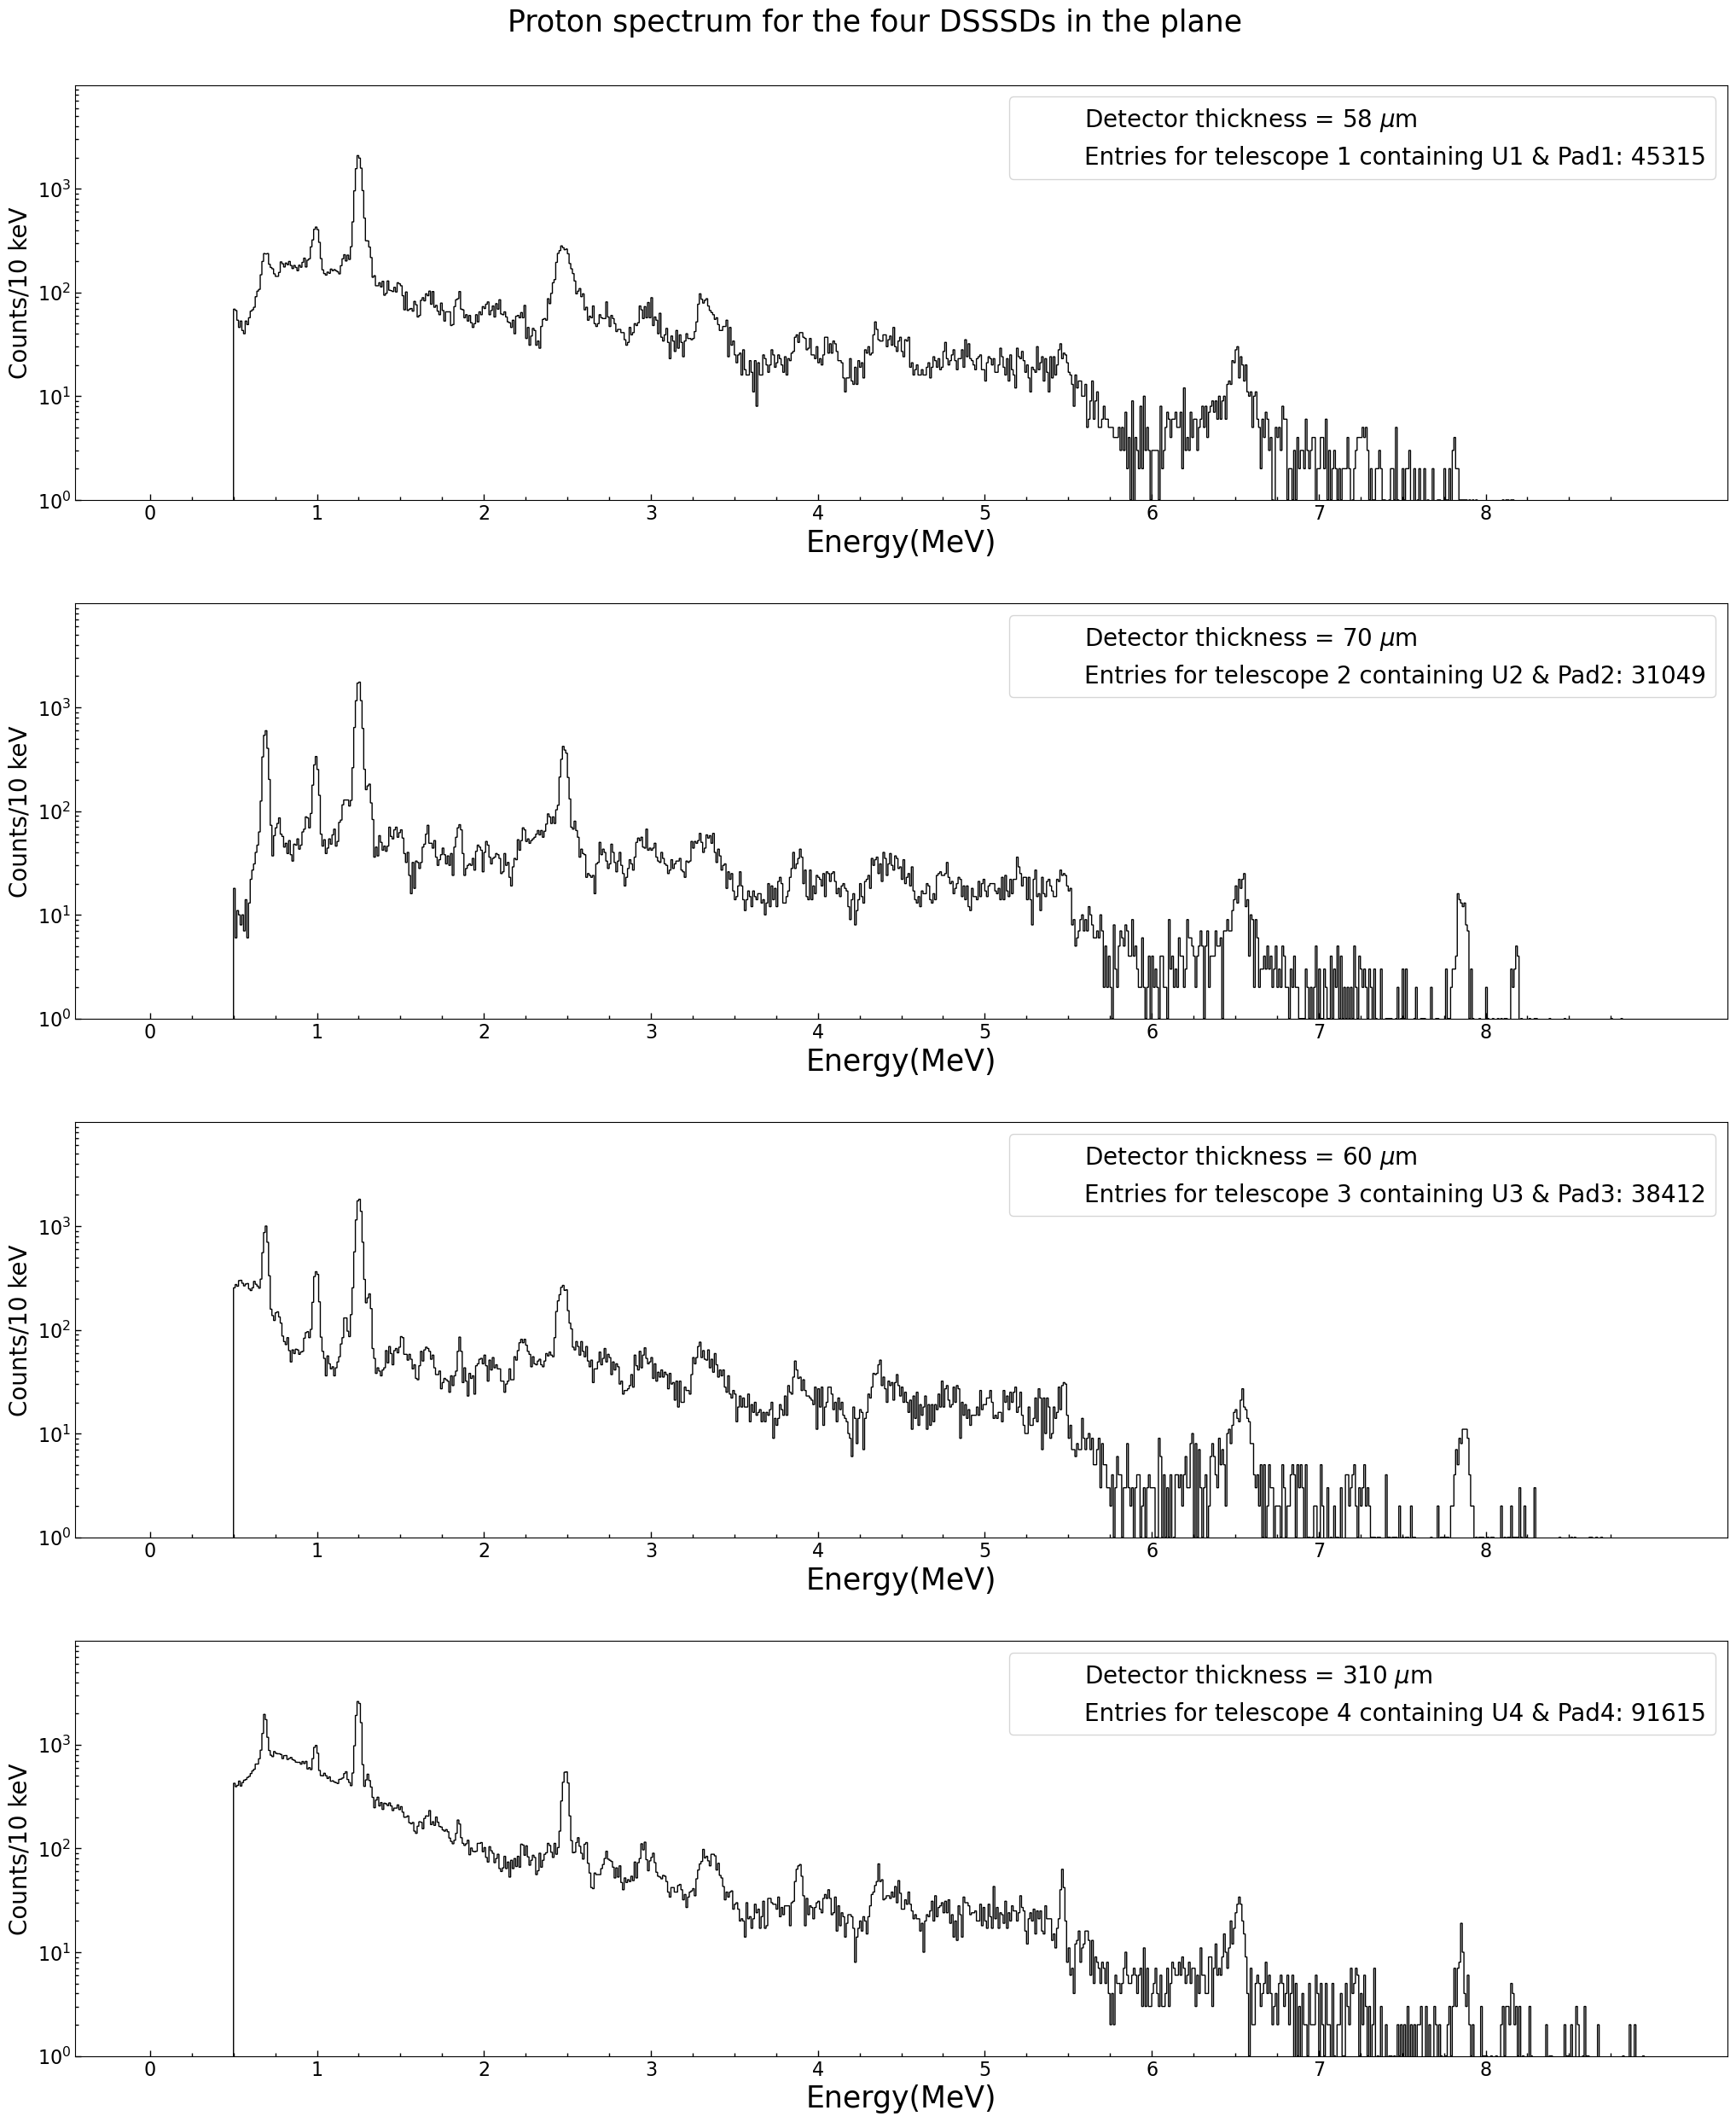

In [6]:

####################
#Sum spektra for the 4 ids where the spurious zone exclusion has not been taken into account, neither has the beta region
# and the dsssd rim has not been excluded.
####################

bin_width = 0.01 # keV
bins = np.arange(0, 9 + bin_width, bin_width)
thicknesses = [58, 70, 60, 310] #for U1, U2, U3, U4(id=0,1,2,3) U5=1002 um U6 = 67 um
fig, axs = plt.subplots(4, 1, figsize=(25,30))#, sharex=True)
plt.subplots_adjust( hspace = 0.25)
ax0, ax1, ax2, ax3 = axs
for (i,ax, e) in zip(range(0,4),axs, Es):
   e = e[e>0.5]
   label1 = f"Entries for telescope {i+1} containing U{i+1} & Pad{i+1}: {len(e)}"
   label2 = r"Detector thickness = {} $\mu$m".format(thicknesses[i])
   ax.plot([], [], ls='', color='none', label=label2)
   ax.plot([], [], ls='', color='none', label=label1)
   ax.hist(e, bins=bins, histtype='step', color='k')
   ax.set_yscale("log")
   ax.set_xticks(np.arange(0, 9, 0.250), minor=True)
   ax.set_xticks(np.arange(0, 9, 1))
   ax.legend(loc='upper right', fontsize=20)
   ax.set_ylim(ymin=1, ymax=9999)
   ax.set_xlabel("Energy(MeV)", fontsize=25)
   ax.set_ylabel("Counts/10 keV", fontsize=20)
   ax.tick_params(axis='y', which='major', direction='in', length=5, width=1, labelsize=16)
   ax.tick_params(axis='y', which='minor', direction='in', length=3, width=1)
   ax.tick_params(axis='x', which='major', direction='in', length=5, width=1, labelsize=16)
   ax.tick_params(axis='x', which='minor', direction='in', length=3, width=1)
plt.suptitle("Proton spectrum for the four DSSSDs in the plane", fontsize=25, y=0.91)
#plt.savefig("/home/haue/repositories/Masters/analysis/python/figure_output/Bananamaker_Sumspectra.png")

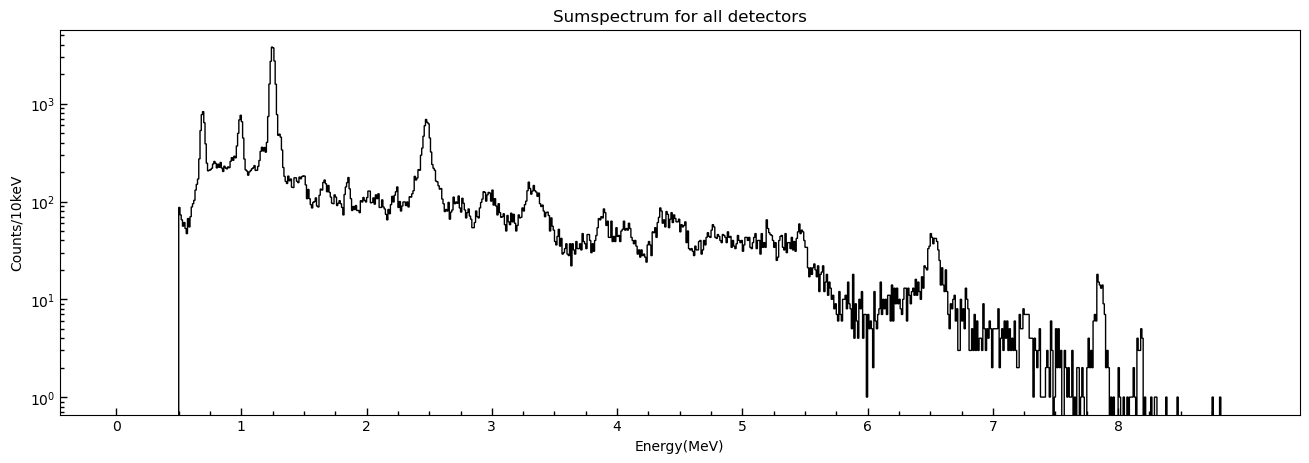

In [7]:
#####Collective plot of all the detectors
e = np.array([e for E_i in Es[:2] for e in E_i])
e = e[e>0.5]
id3_e = np.array(Es[3])
id3_e = id3_e[id3_e>1]
np.append(e, id3_e)
fig, ax = plt.subplots(figsize=(16, 5))
ax.hist(e, bins=bins, histtype='step', edgecolor='k', color='white', lw=1)
ax.set_yscale('log')
ax.set_xticks(np.arange(0.5, 9, 0.25), minor=True)
ax.set_xticks(np.arange(0, 9, 1))
ax.set_xlabel("Energy(MeV)")
ax.set_ylabel("Counts/10keV")
ax.set_title("Sumspectrum for all detectors")
plt.tick_params(axis='y', which='major', direction='in', length=5, width=1)
plt.tick_params(axis='y', which='minor', direction='in', length=3, width=1)
plt.tick_params(axis='x', which='major', direction='in', length=5, width=1)
plt.tick_params(axis='x', which='minor', direction='in', length=3, width=1)

#plt.savefig("/home/haue/repositories/Masters/analysis/python/figure_output/Bananamaker_Sumspectra(alldets).png")

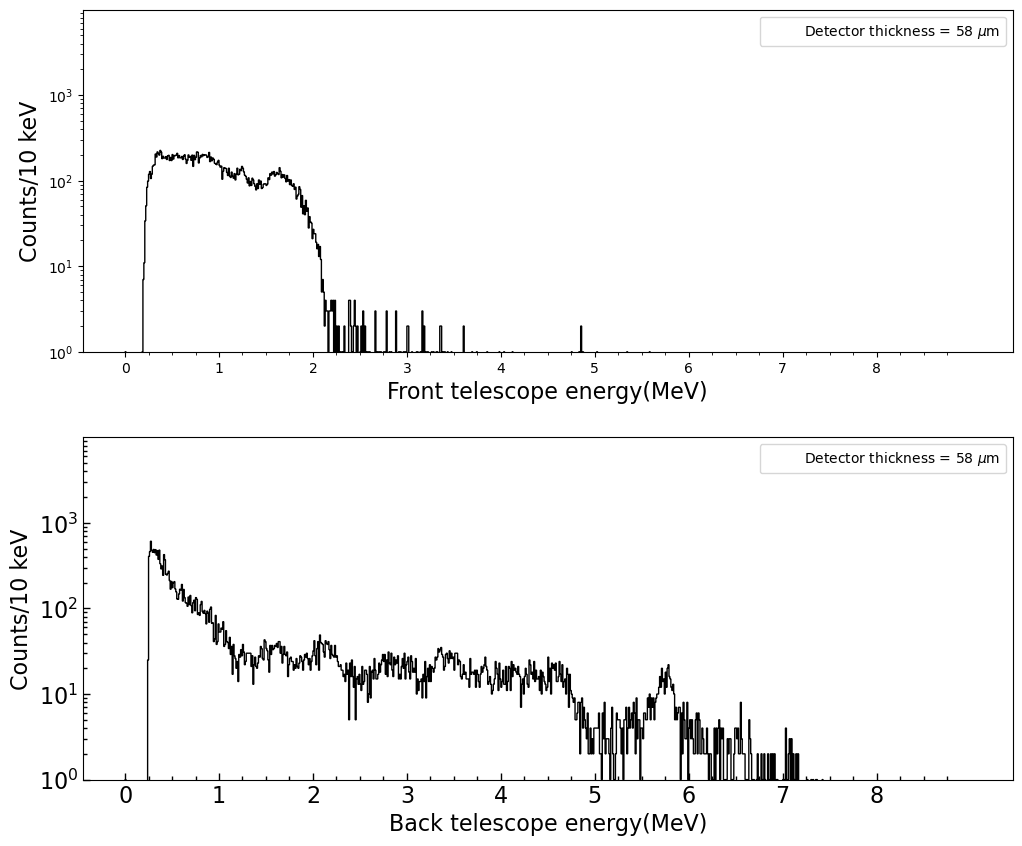

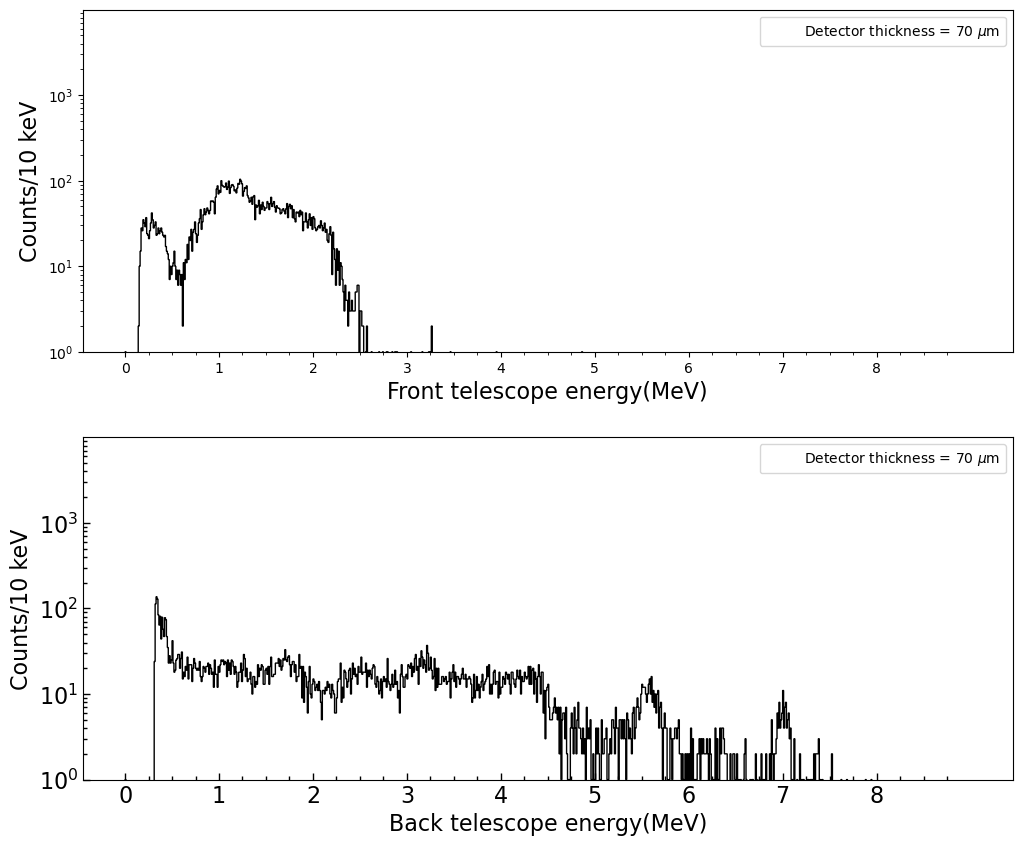

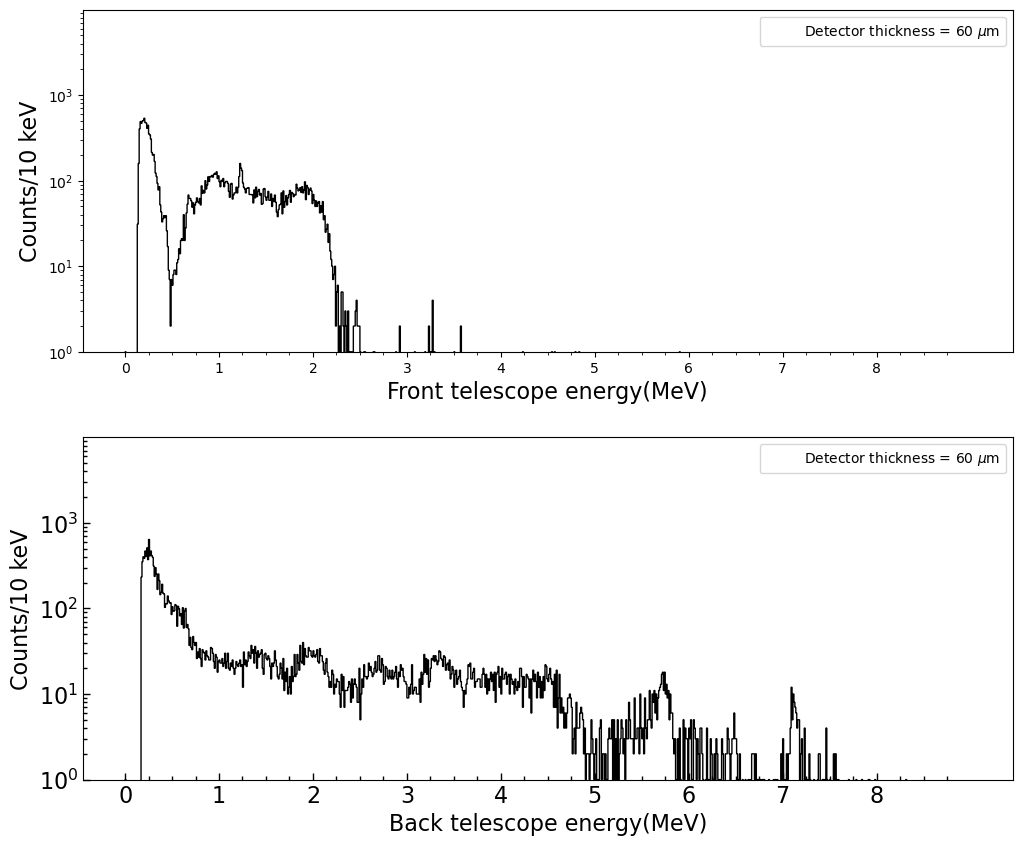

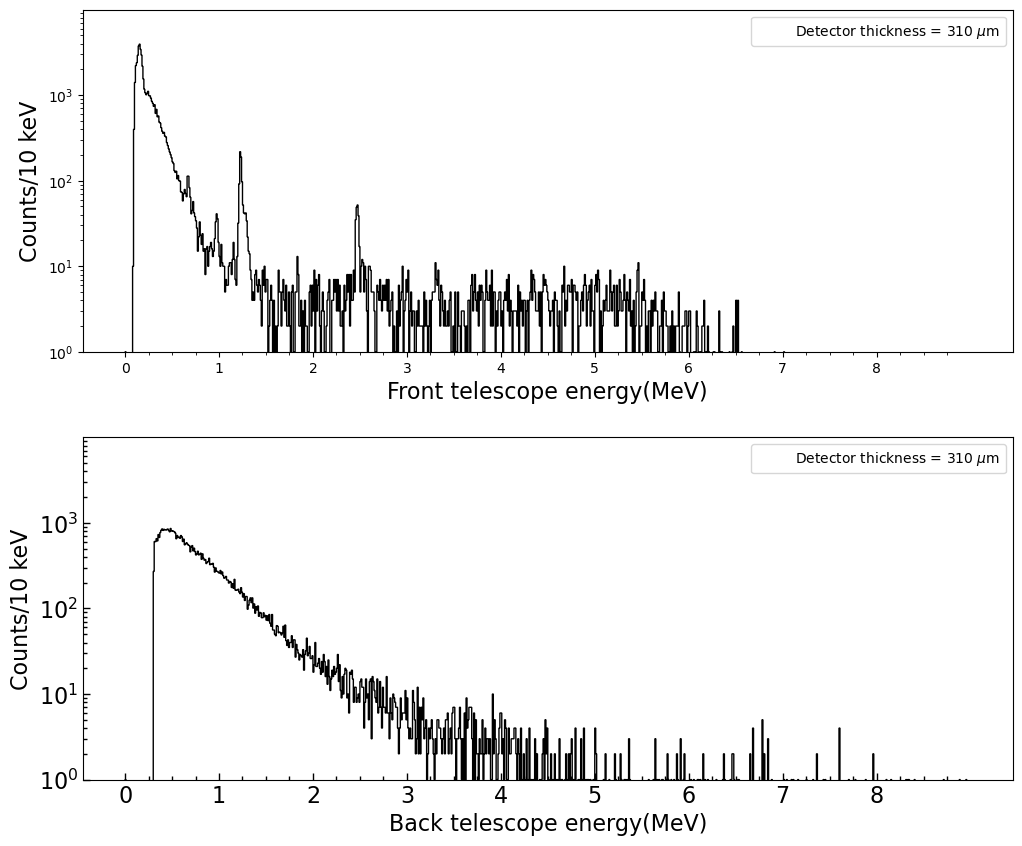

In [8]:

####################
#histograms of fEdep and bEdep
####################

bin_width = 0.01 # keV
bins = np.arange(0, 9 + bin_width, bin_width)
thicknesses = [58, 70, 60, 310] #for U1, U2, U3, U4(id=0,1,2,3) U5=1002 um U6 = 67 um
for (i, ef, eb) in zip(range(0,4), front_telescope_Es, back_telescope_Es):
   #label1 = f"Entries for telescope {i+1} containing U{i+1} & Pad{i+1}: {len(e)}"
   label2 = r"Detector thickness = {} $\mu$m".format(thicknesses[i])
   fig, axs = plt.subplots(2, 1, figsize=(12,10))#, sharex=True)
   plt.subplots_adjust( hspace = 0.25)
   
   ax0, ax1 = axs
   ax0.plot([], [], ls='', label=label2)
   ax1.plot([], [], ls='', label=label2)
   ax0.hist(ef, bins=bins, histtype='step', color='k')
   ax1.hist(eb, bins=bins, histtype='step', color='k')
   ax0.set_yscale("log")
   ax0.set_xticks(np.arange(0, 9, 0.250), minor=True)
   ax0.set_xticks(np.arange(0, 9, 1))
   ax0.set_ylim(ymin=1, ymax=9999)
   ax1.set_yscale("log")
   ax1.set_xticks(np.arange(0, 9, 0.250), minor=True)
   ax1.set_xticks(np.arange(0, 9, 1))
   ax1.set_ylim(ymin=1, ymax=9999)
   ax0.set_xlabel("Front telescope energy(MeV)", fontsize=16)
   ax0.set_ylabel("Counts/10 keV", fontsize=16)
   ax1.set_xlabel("Back telescope energy(MeV)", fontsize=16)
   ax1.set_ylabel("Counts/10 keV", fontsize=16)
   ax0.legend()
   ax1.legend()
   plt.tick_params(axis='y', which='major', direction='in', length=5, width=1, labelsize=16)
   plt.tick_params(axis='y', which='minor', direction='in', length=3, width=1)
   plt.tick_params(axis='x', which='major', direction='in', length=5, width=1, labelsize=16)
   plt.tick_params(axis='x', which='minor', direction='in', length=3, width=1)


In [10]:
###
# Need to load in my banana cuts made on the graphs below so it can be visually seen what the cuts are.
###

cuts = "/home/haue/repositories/Masters/data/cuts/totcuts.root"
cutfile = uproot.open(cuts)

xU1, yU1 = cutfile["bananaU1"].values()
xU2, yU2 = cutfile["bananaU2"].values()
xU3, yU3 = cutfile["bananaU3"].values()
xU4, yU4 = cutfile["bananaU4"].values()
xs = [xU1, xU2, xU3, xU4]
xs = [i/1e3 for i in xs]
ys = [yU1, yU2, yU3, yU4]
ys = [i/1e3 for i in ys]


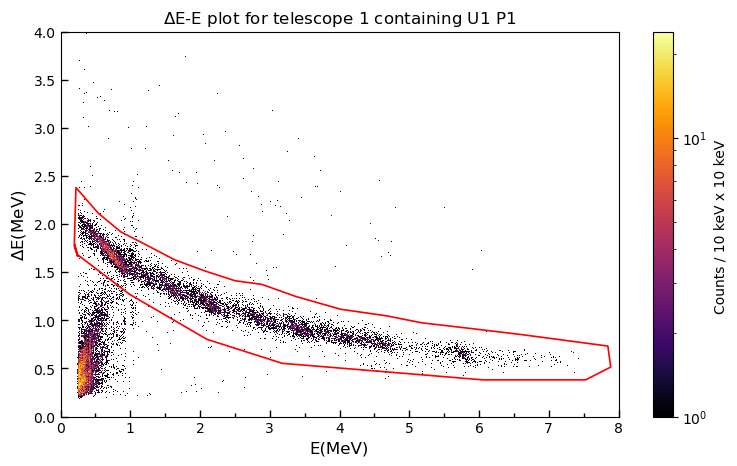

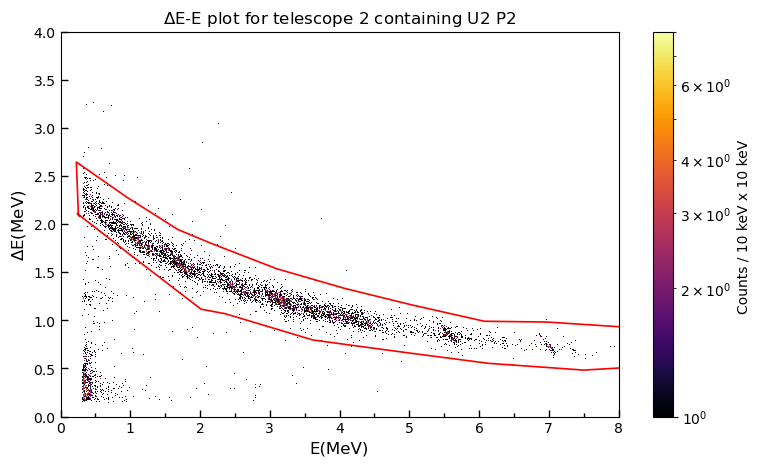

In [11]:
####################
#Delta E E plots for the rough matching of telescope events 
#bin width = 0.1 for i =3 bin width = 30 keV why tho=
for (i,ax, ef, eb, x, y) in zip(range(0,4),axs, front_telescope_Es, back_telescope_Es, xs, ys):
    plt.figure(figsize=(9,5))
    #plt.scatter(eb, ef, marker='o', s=2, color='k') 
    plt.plot(x, y, color='r', lw=1.2)
    if(i==3):
        plt.hist2d(eb, ef, bins=(np.arange(0, 10, 0.01), np.arange(0, 8, 0.01)),
                   cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
    else:
        plt.hist2d(eb, ef, bins=(np.arange(0, 10, 0.01), np.arange(0, 4, 0.01)),
                   cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(), rasterized=True)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(f"Counts / 10 keV x 10 keV ")
    plt.gca().set_xticks(np.arange(0, 8, 0.5), minor=True)
    plt.xlim(0, 8)
    if (i==3):
        plt.ylim(0, 8)
    else:
        plt.ylim(0,4)
    plt.tick_params(axis='y', which='major', direction='in', length=5, width=1)
    plt.tick_params(axis='y', which='minor', direction='in', length=3, width=1)
    plt.tick_params(axis='x', which='major', direction='in', length=5, width=1)
    plt.tick_params(axis='x', which='minor', direction='in', length=3, width=1)

    plt.xlabel("E(MeV)", fontsize=12)
    plt.ylabel(r"$\Delta$E(MeV)", fontsize=12)
    plt.title(rf"$\Delta$E-E plot for telescope {i+1} containing U{i+1} P{i+1}", fontsize=12)
    plt.savefig(f"/home/haue/repositories/Masters/analysis/python/figure_output/Bananaplots_U{i+1}.png")

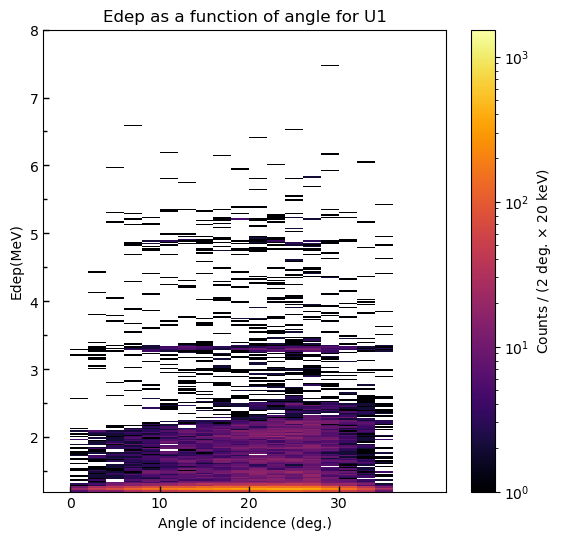

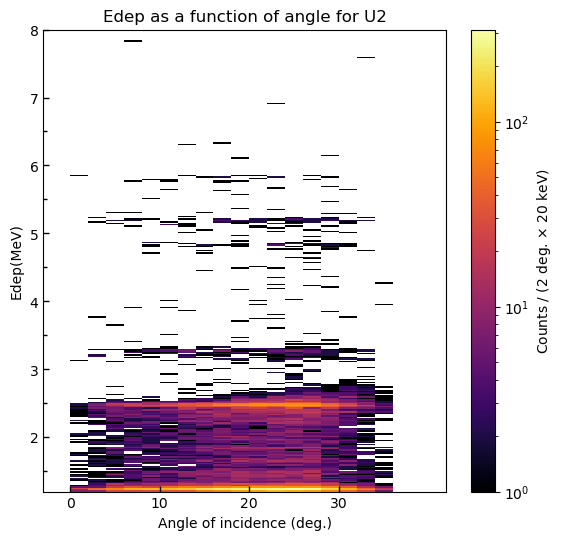

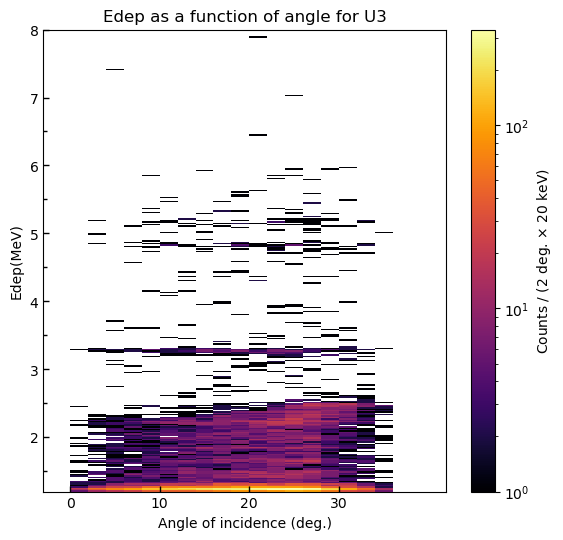

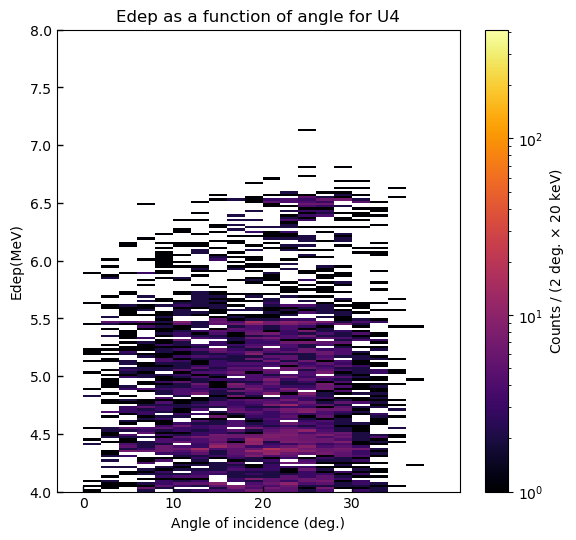

In [ ]:
####################
#angle of incidence plots made using the bananamaker script i made
#This plot is done with the Edep from the DSSSD hits only, where telescope hits have been filtered out
####################

for (i, e, ang) in zip(range(0,4), Edeps, angles_of_incidence):
    
    mask = ~np.isnan(e)
    filtered_angle = ang[mask]
    filtered_e = e[mask]    
    plt.figure(figsize=(6.5,6))
    plt.hist2d(filtered_angle, filtered_e, bins=(np.arange(0, 42, 2), np.arange(0, 8, 0.02)), 
               cmap=plt.cm.inferno, norm=mpl.colors.LogNorm())
    cbar = plt.colorbar()
    cbar.set_label('Counts / (2 deg. $\\times$ 20 keV)')
    
    ##Formatting of figures
    plt.xticks(np.arange(0, 40, 10))
    plt.xlim(-3, 42)
    plt.tick_params(axis='y', which='major', direction='in', length=4, width=1)
    plt.tick_params(axis='y', which='minor', direction='in', length=3, width=1)
    plt.tick_params(axis='x', which='major', direction='in', length=4, width=1)
    plt.gca().set_yticks(np.arange(0, 7.5, 0.5), minor=True)
    plt.xlabel("Angle of incidence (deg.)")
    plt.ylabel("Edep(MeV)")
    plt.title(f"Edep as a function of angle for U{i+1}", fontsize=12)
    if(i==3):
        plt.ylim(4., 8.)
    else: 
        plt.ylim(1.2, 8.)
    plt.savefig(f"/home/haue/repositories/Masters/analysis/python/figure_output/Angle_of_incidence_U{i+1}.png")        

In [18]:
datpath = "/home/haue/repositories/Masters/simdata/"
suffixes = ["U154.dat","U156.dat","U158.dat","U4295.dat","U4300.dat","U4305.dat","U4310.dat"]
angles = []; fedeps_up = []; bedeps_up =[]; Ep_up =[];fedeps_low = []; bedeps_low =[]; Ep_low =[]
for i in suffixes:
    ang, E, fedep, bedep = np.loadtxt(datpath+i, unpack=True)
    E/=1e3; fedep/=1e3; bedep/=1e3
    ang0 = np.min(ang)
    ang1 = np.max(ang)
    Ep0 = E[(ang==ang0)]
    Ep1 = E[(ang==ang1)]
    fedep0 = fedep[(ang==ang0)]
    fedep1 = fedep[(ang==ang1)]
    bedep0 = bedep[(ang==ang0)]
    bedep1 = bedep[(ang==ang1)]
    Ep_up.append(Ep0)
    Ep_low.append(Ep1)
    fedeps_low.append(fedep0)
    fedeps_up.append(fedep1)
    bedeps_low.append(bedep0)
    bedeps_up.append(bedep1)

Text(0.5, 1.0, 'Banana plot for U4')

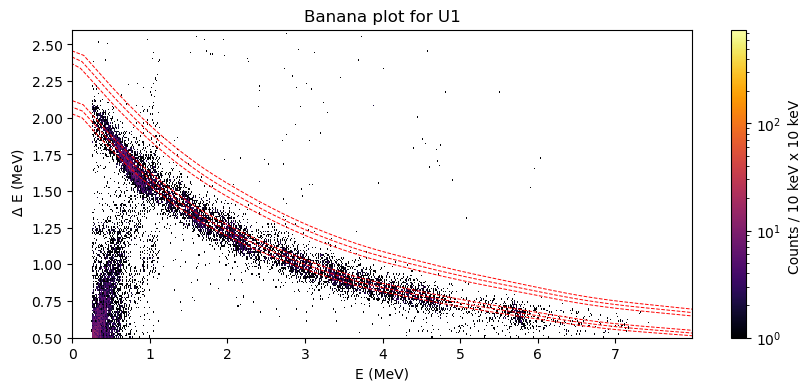

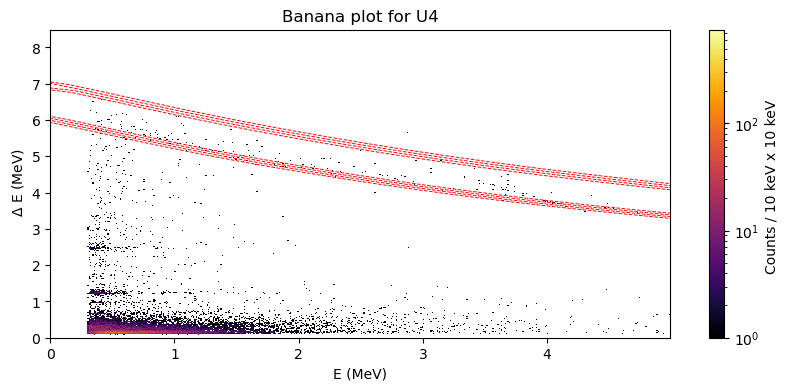

In [28]:
plt.figure(figsize=(10,4))
plt.hist2d(back_telescope_Es[0], front_telescope_Es[0], bins=(np.arange(0, 8, 0.01), np.arange(0, 5.1, 0.01)),
                   cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(vmin=1, vmax=750), rasterized=True)
cbar = plt.colorbar()
cbar.ax.set_ylabel(f"Counts / 10 keV x 10 keV ")

for i in range(3):
    plt.plot(bedeps_up[i], fedeps_up[i], color='r', ls='--', lw=0.7)
    plt.plot(bedeps_low[i], fedeps_low[i], color='r', ls='--', lw=0.7)
plt.xlabel("E (MeV)")
plt.ylabel(r" $\Delta$ E (MeV)")
plt.title(f"Banana plot for U1")
plt.ylim(0.5,2.6)

plt.figure(figsize=(10,4))
plt.hist2d(back_telescope_Es[3], front_telescope_Es[3], bins=(np.arange(0, 5, 0.01), np.arange(0, 8.5, 0.01)),
                   cmap=plt.cm.inferno, norm=mpl.colors.LogNorm(vmin=1, vmax=750), rasterized=True)
cbar = plt.colorbar()
cbar.ax.set_ylabel(f"Counts / 10 keV x 10 keV ")

for i in range(3, len(suffixes)):
    plt.plot(bedeps_up[i], fedeps_up[i], color='r', ls='--', lw=0.7)
    plt.plot(bedeps_low[i], fedeps_low[i], color='r', ls='--', lw=0.7)
plt.xlabel("E (MeV)")
plt.ylabel(r" $\Delta$ E (MeV)")
plt.title(f"Banana plot for U4")